In [1]:
from binance import Client
import csv
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
apiKey = 'M1dOjD5eP7O6RmlmPR3NQvGC2a6m5G9qrpoDkVvhoj4SElRrq7TqZcrcjRdorm03'
apiSecret = 'Xp0VLnY7U2PdKqrshHVZFeQmx1lP80hs4WWdMB6dZw9GkcI4dE1y7JhkgTIdKsVd'

In [3]:
client = Client(apiKey, apiSecret, testnet= True)

In [10]:
symbol = 'BTCUSDT'
interval='1m'
dir_file_name = "data/data_" + symbol + '_' +interval + '.csv'
start = ['6000','5000','4000','3000','2000','1000']
end = ['5000','4000','3000','2000','1000','0']


In [17]:
def crawl_data(symbol, interval, start, end):
    dir_file_name = "data/6000/data_" + symbol + '_' +interval +'_'+start+ '.csv'
    frame = pd.DataFrame(client.get_historical_klines(symbol=symbol, interval= interval, start_str= start+' min ago UTC', end_str= end+' min ago UTC'))
    frame = frame.iloc[:,:6]
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    frame.to_csv(dir_file_name)
    print("success interval ")

In [18]:
for i in range(6):
    crawl_data(symbol, interval, start[i], end[i])

success interval 
success interval 
success interval 
success interval 
success interval 
success interval 


In [25]:
df = pd.read_csv('data/data_BTCUSDT_1m.csv')

In [26]:
df

,Time,Open,High,Low,Close,Volume
0,2022-01-25 03:35:00,36324.51,36380.94,36324.51,36355.17,0.457329
1,2022-01-25 03:36:00,36356.43,36373.57,36305.58,36373.57,0.590016
2,2022-01-25 03:37:00,36332.55,36332.55,36314.23,36329.92,0.327608
3,2022-01-25 03:38:00,36335.57,36341.88,36309.40,36320.34,0.295082
4,2022-01-25 03:39:00,36318.67,36367.06,36318.67,36367.06,0.436759
...,...,...,...,...,...,...
995,2022-01-25 20:10:00,36835.98,36870.70,36812.06,36867.00,0.853752
996,2022-01-25 20:11:00,36873.07,36900.00,36825.78,36853.00,0.939684
997,2022-01-25 20:12:00,36852.99,36875.00,36830.81,36839.19,0.771043
998,2022-01-25 20:13:00,36827.59,36857.49,36825.21,36851.25,0.710367


In [27]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [29]:
train, test = train_test_split(df, test_size=0.2)

In [30]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('High', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

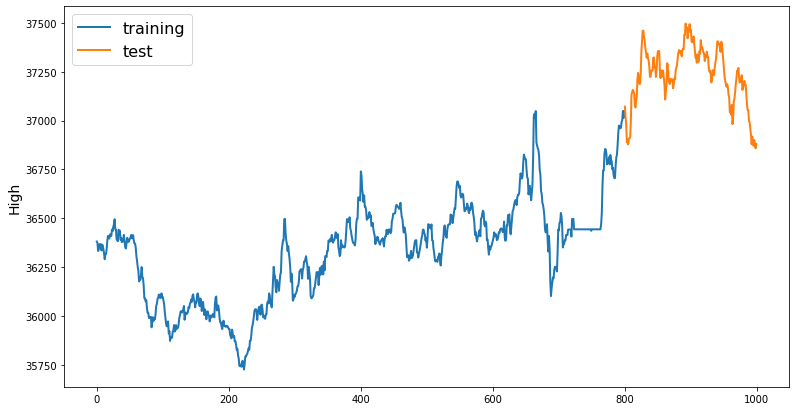

In [33]:
line_plot(train['High'], test['High'], 'training', 'test', title='')